In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Pavani\OneDrive\Attachments\Desktop\Walmart_Data_Analysis_and_Forcasting.csv")
#pd.set_option("display.max_rows", None)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
#Check Missing Values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
#Data Cleaning
##Data Cleaning
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert Date column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') 

In [12]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

In [13]:
total_sales = df['Weekly_Sales'].sum()
avg_sales = df['Weekly_Sales'].mean()
max_sales = df['Weekly_Sales'].max()
min_sales = df['Weekly_Sales'].min()

total_sales, avg_sales, max_sales, min_sales


(np.float64(6737218987.11),
 np.float64(1046964.8775617715),
 3818686.45,
 209986.25)

In [14]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum()

store_sales.head()


Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

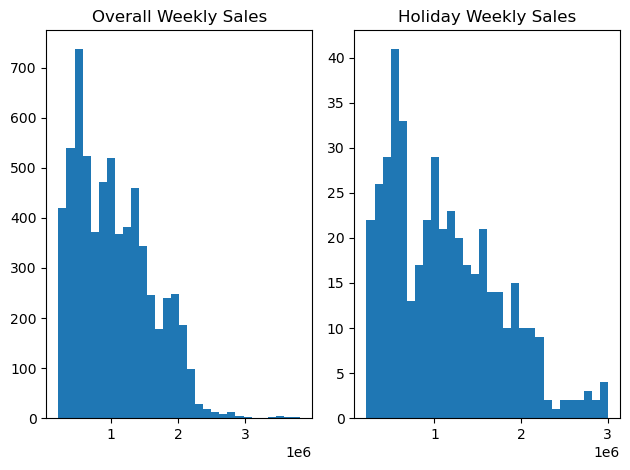

In [37]:
#plt.figure(figsize=(14,6))

# Overall Sales
plt.subplot(1,2,1)
plt.hist(df['Weekly_Sales'], bins=30)
plt.title("Overall Weekly Sales")

# Holiday Sales
plt.subplot(1,2,2)
plt.hist(df[df['Holiday_Flag'] == 1]['Weekly_Sales'], bins=30)
plt.title("Holiday Weekly Sales")

plt.tight_layout()
plt.show()


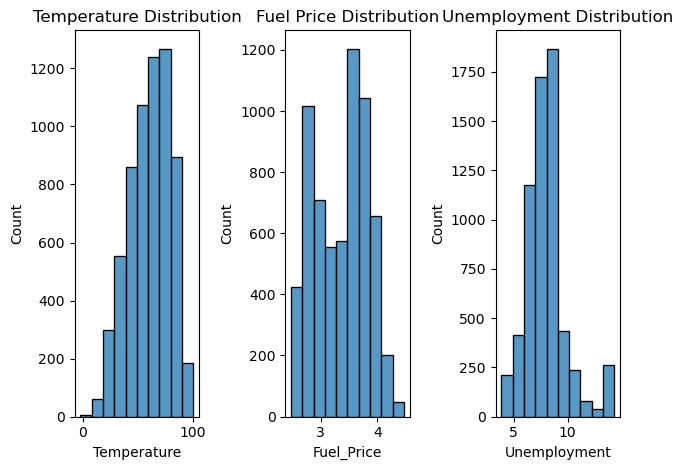

In [40]:
#plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.histplot(df['Temperature'], bins=10)
plt.title("Temperature Distribution")

plt.subplot(1,3,2)
sns.histplot(df['Fuel_Price'], bins=10)
plt.title("Fuel Price Distribution")

plt.subplot(1,3,3)
sns.histplot(df['Unemployment'], bins=10)
plt.title("Unemployment Distribution")

plt.tight_layout()
plt.show()


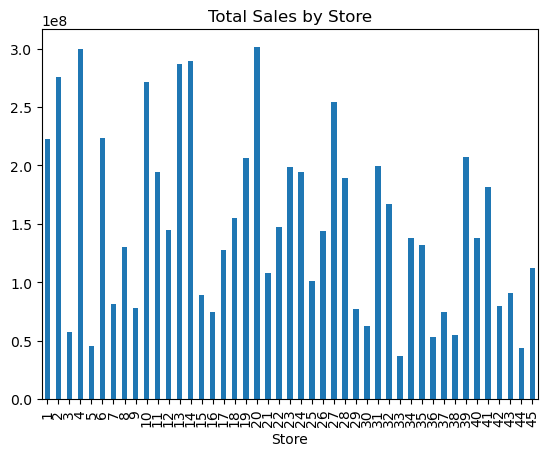

In [16]:
store_sales.plot(kind='bar')
plt.title("Total Sales by Store")
#plt.xlabel("Store")
#plt.ylabel("Weekly Sales")
plt.show()

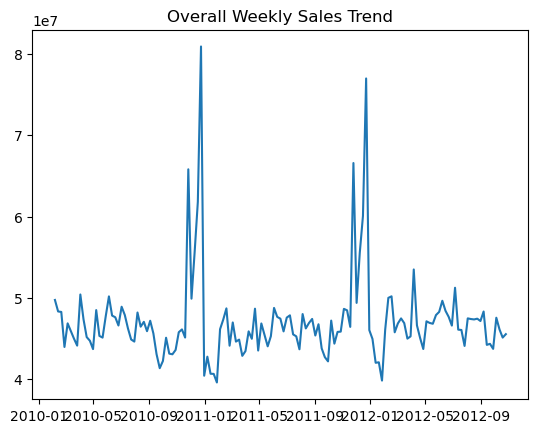

In [18]:
date_sales = df.groupby('Date')['Weekly_Sales'].sum()

plt.plot(date_sales.index, date_sales.values)
plt.title("Overall Weekly Sales Trend")
#plt.xlabel("Date")
#plt.ylabel("Weekly Sales")
plt.show()


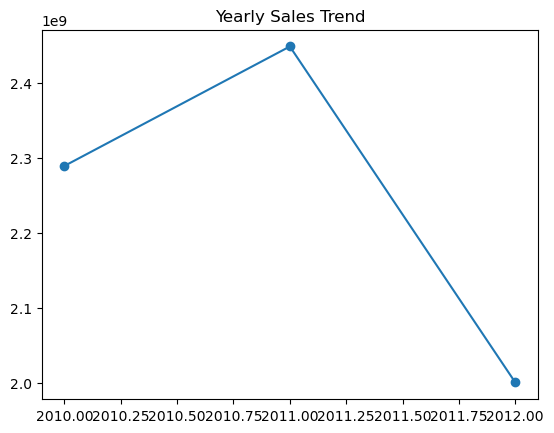

In [19]:
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum()

plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title("Yearly Sales Trend")
#plt.xlabel("Year")
#plt.ylabel("Sales")
plt.show()

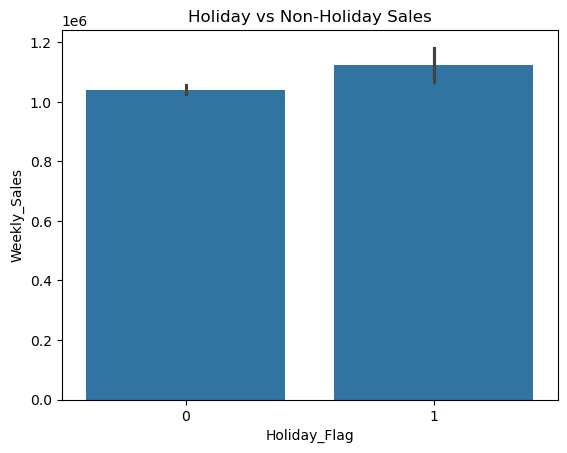

In [21]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Holiday vs Non-Holiday Sales")
#plt.xlabel("Holiday Flag")
#plt.ylabel("Weekly Sales")
plt.show()


In [25]:
top_stores = store_sales.sort_values(ascending=False).head(5)
low_stores = store_sales.sort_values().head(5)

top_stores, low_stores


(Store
 20    3.013978e+08
 4     2.995440e+08
 14    2.889999e+08
 13    2.865177e+08
 2     2.753824e+08
 Name: Weekly_Sales, dtype: float64,
 Store
 33    37160221.96
 44    43293087.84
 5     45475688.90
 36    53412214.97
 38    55159626.42
 Name: Weekly_Sales, dtype: float64)

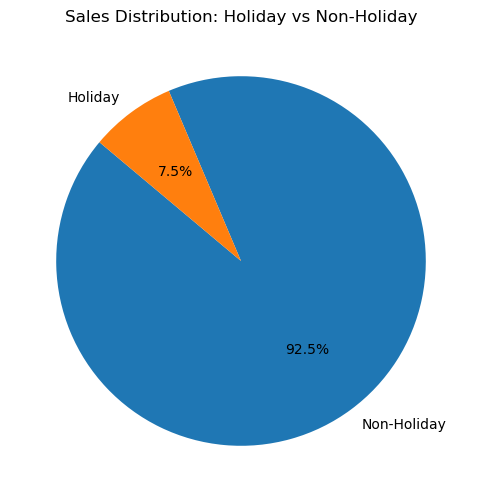

In [26]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(
    holiday_sales,
    labels=['Non-Holiday', 'Holiday'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Sales Distribution: Holiday vs Non-Holiday")
plt.show()


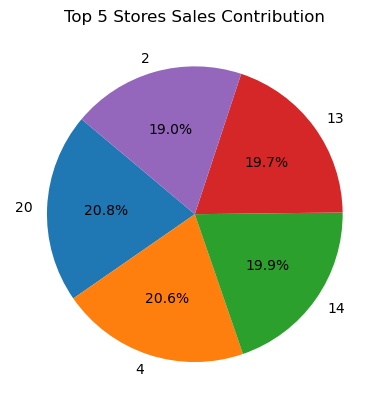

In [30]:
top5_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
#plt.figure(figsize=(6,6))
plt.pie(
    top5_stores,
    labels=top5_stores.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Top 5 Stores Sales Contribution")
plt.show()

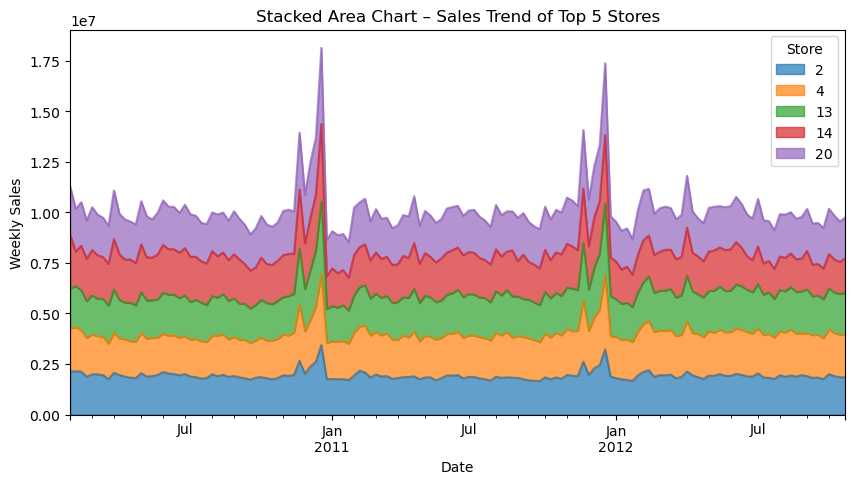

In [31]:
top5_store_ids = top5_stores.index.tolist()

top_store_sales = df[df['Store'].isin(top5_store_ids)]
pivot_store_trend = pd.pivot_table(
    top_store_sales,
    values='Weekly_Sales',
    index='Date',
    columns='Store',
    aggfunc='sum'
)

pivot_store_trend.plot(
    kind='area',
    stacked=True,
    figsize=(10,5),
    alpha=0.7
)

plt.title("Stacked Area Chart – Sales Trend of Top 5 Stores")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


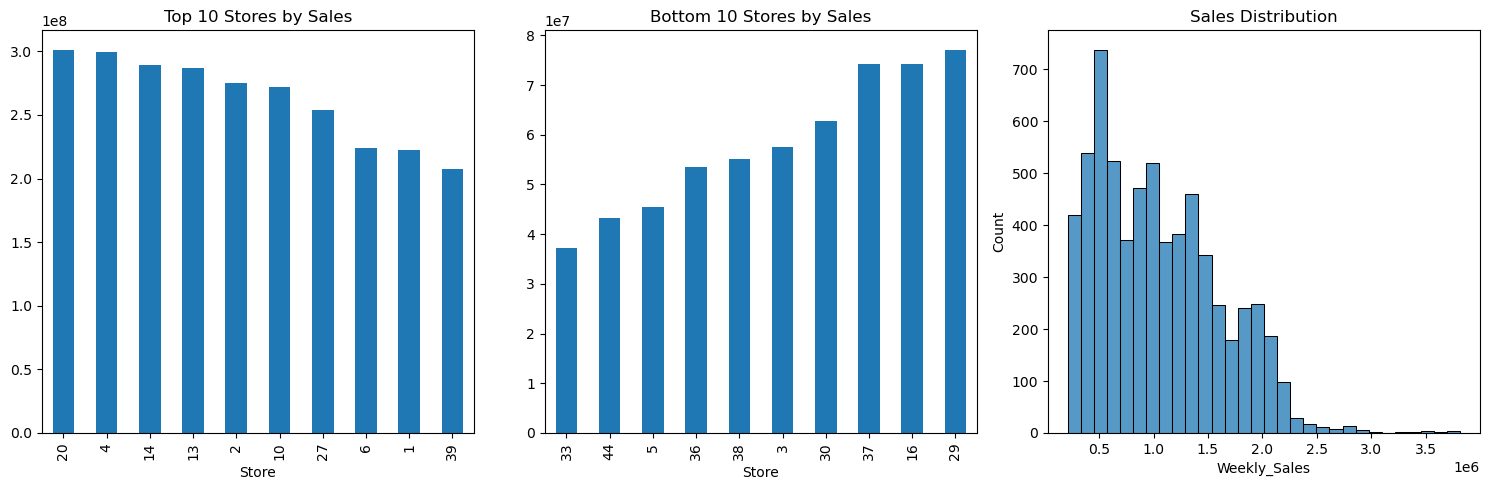

In [33]:
plt.figure(figsize=(15,5))

# Top 10 Stores
plt.subplot(1,3,1)
top10 = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
top10.plot(kind='bar')
plt.title("Top 10 Stores by Sales")

# Bottom 10 Stores
plt.subplot(1,3,2)
bottom10 = df.groupby('Store')['Weekly_Sales'].sum().sort_values().head(10)
bottom10.plot(kind='bar')
plt.title("Bottom 10 Stores by Sales")

# Sales Distribution
plt.subplot(1,3,3)
sns.histplot(df['Weekly_Sales'], bins=30)
plt.title("Sales Distribution")

plt.tight_layout()
plt.show()


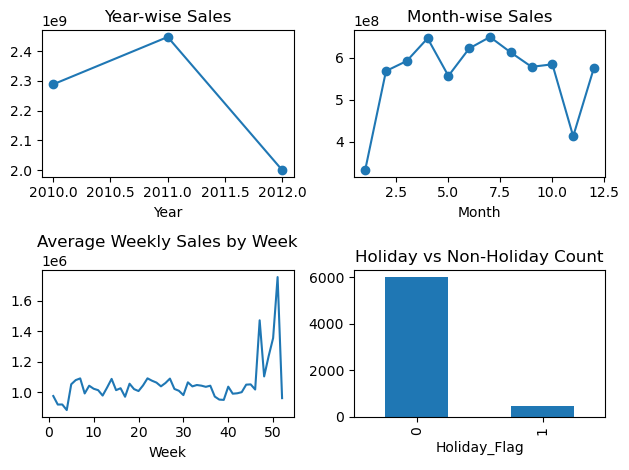

In [35]:
#plt.figure(figsize=(14,10))

# Year-wise Sales
plt.subplot(2,2,1)
df.groupby('Year')['Weekly_Sales'].sum().plot(marker='o')
plt.title("Year-wise Sales")

# Month-wise Sales
plt.subplot(2,2,2)
df.groupby('Month')['Weekly_Sales'].sum().plot(marker='o')
plt.title("Month-wise Sales")

# Week-wise Sales
plt.subplot(2,2,3)
df.groupby('Week')['Weekly_Sales'].mean().plot()
plt.title("Average Weekly Sales by Week")

# Holiday Count
plt.subplot(2,2,4)
df['Holiday_Flag'].value_counts().plot(kind='bar')
plt.title("Holiday vs Non-Holiday Count")

plt.tight_layout()
plt.show()


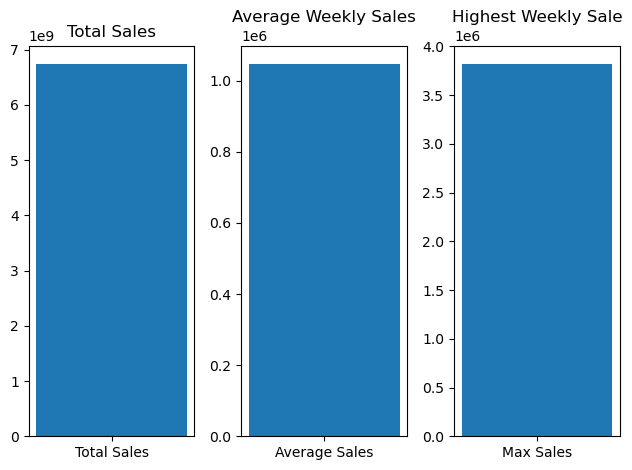

In [36]:
#plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.bar(['Total Sales'], [df['Weekly_Sales'].sum()])
plt.title("Total Sales")

plt.subplot(1,3,2)
plt.bar(['Average Sales'], [df['Weekly_Sales'].mean()])
plt.title("Average Weekly Sales")

plt.subplot(1,3,3)
plt.bar(['Max Sales'], [df['Weekly_Sales'].max()])
plt.title("Highest Weekly Sale")

plt.tight_layout()
plt.show()


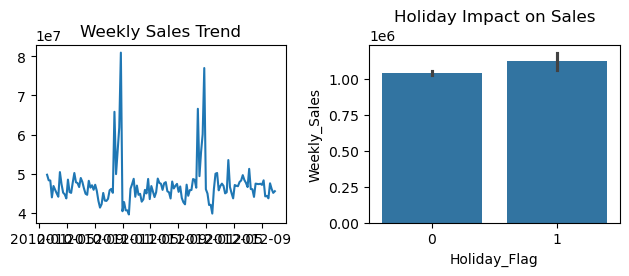

In [29]:
#plt.figure(figsize=(14,10))

# Subplot 1: Weekly Sales Trend
plt.subplot(2,2,1)
date_sales = df.groupby('Date')['Weekly_Sales'].sum()
plt.plot(date_sales.index, date_sales.values)
plt.title("Weekly Sales Trend")

# Subplot 2: Holiday Impact
plt.subplot(2,2,2)
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Holiday Impact on Sales")


plt.tight_layout()
plt.show()


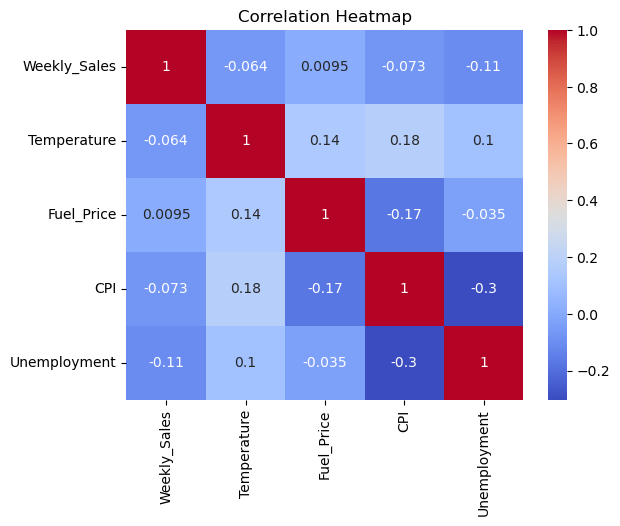

In [24]:
corr = df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
